# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [26]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [27]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [28]:
x = pyber_data_df.sum()["driver_count"]
x


68709

## Deliverable 1: Get a Summary DataFrame 

In [29]:
#  1. Get the total rides for each city type
rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [30]:
# 2. Get the total drivers for each city type
drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [31]:
#  3. Get the total amount of fares for each city type
fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [32]:
#  4. Get the average fare per ride for each city type. 
avg_fares = fares_by_type / rides_by_type
avg_fares

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [33]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = fares_by_type / drivers_by_type
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [34]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
    {'Total Rides' : rides_by_type,
    'Total Drivers' : drivers_by_type,
    'Total Fares' : fares_by_type,
    'Average Fare per Ride' : avg_fares,
     'Average Fare per Driver': avg_fare_per_driver
    })

pyber_summary_df.index.name = None     
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [35]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [36]:
#  8. Format the columns.

pyber_summary_df = pd.DataFrame(
    {'Total Rides' : rides_by_type.map('{:,.0f}'.format),
    'Total Drivers' : drivers_by_type.map('{:,.0f}'.format),
    'Total Fares' : fares_by_type.map('${:,.2f}'.format),
    'Average Fare per Ride' : avg_fares.map('${:,.2f}'.format),
     'Average Fare per Driver': avg_fare_per_driver.map('${:,.2f}'.format)
    })

pyber_summary_df.index.name = None     

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [37]:
# 9. Using groupby() on the pyber_data_df to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

fare_by_date = pyber_data_df.groupby(["date", "type"]).sum()["fare"]

In [38]:
# 10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fare_by_date = fare_by_date.reset_index()


In [39]:
# 11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

fare_by_date_pivot = fare_by_date.pivot(index = "date", columns = "type", values = "fare")
fare_by_date_pivot


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [52]:
# 12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2018-01-01':'2018-04-29'.

first_four_months = fare_by_date_pivot.loc[2019-1-1 : 2019-4-29]
first_four_months.head(10)

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.datetimes.DatetimeIndex'> with these indexers [2017] of <class 'int'>

In [53]:
# 13. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

fare_by_date_pivot.index = pd.to_datetime(fare_by_date_pivot.index)
fare_by_date_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [54]:
first_four_months = fare_by_date_pivot.loc[2019-1-1 : 2019-4-29]
first_four_months.head(10)

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.datetimes.DatetimeIndex'> with these indexers [2017] of <class 'int'>

In [55]:
# 14. Check that the datatype for the index is datetime using df.info()
fare_by_date_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [56]:
# 15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_by_week = fare_by_date_pivot.resample("W").sum()
fare_by_week.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


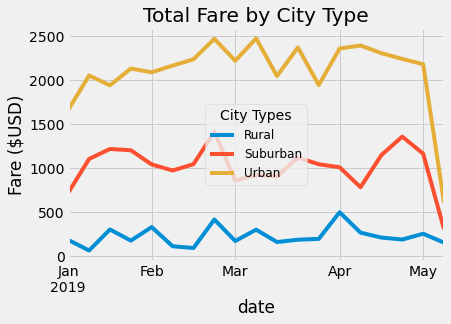

In [75]:
# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.

style.use('fivethirtyeight')
fare_by_week.plot()
plt.ylabel("Fare ($USD)")
plt.title("Total Fare by City Type")
lgnd = plt.legend(fontsize="12", mode="Expanded",  loc="center", title="City Types")
